In [1]:
from utils import ModelImporter, Preprocessing
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
pre = Preprocessing('fer2013')
train = pre.load_data(filename='DatasetAA.csv.gz', name='train')
train_no_happy = train.loc[train['emotion'] != 3]
train_no_happy = train_no_happy.reset_index().drop(columns = ['index'])

In [22]:
from image_utils import ImageConverter
import matplotlib.pyplot as plt

In [23]:
img_conv = ImageConverter()

In [24]:
train_no_happy_np = train_no_happy.drop(columns = ['emotion']).values

In [25]:
array_0 = train_no_happy_np[0]
array_0_frame = img_conv.reshape_array_to_frame(array_0)
array_0_frame_flipped = img_conv.rotate_image(array_0_frame, 20)

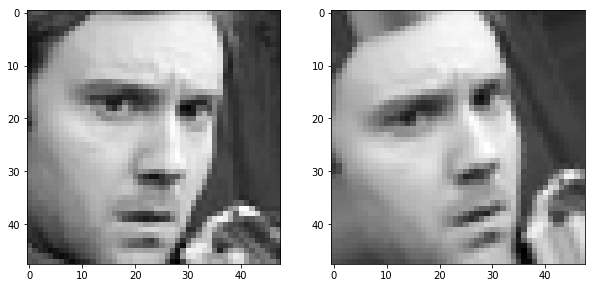

In [26]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_0_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_0_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [27]:
array_50 = train_no_happy_np[50]
array_50_frame = img_conv.reshape_array_to_frame(array_50)
array_50_frame_flipped = img_conv.rotate_image(array_50_frame, 20)

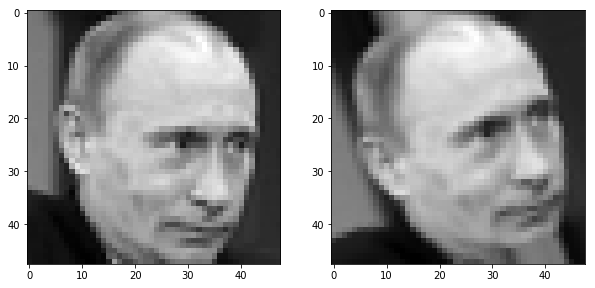

In [28]:
plt.figure(1, figsize=(10, 5))
plt.subplot(1,2, 1)
plt.imshow(array_50_frame, cmap='gray', interpolation='none')
plt.subplot(1,2, 2)
plt.imshow(array_50_frame_flipped, cmap='gray', interpolation='none')
plt.show()

In [29]:
rotated_10_train = np.zeros(shape=train_no_happy_np.shape)
rotated_20_train = np.zeros(shape=train_no_happy_np.shape)
idx = 0
for i in range(len(train_no_happy_np)):
    array = train_no_happy_np[i]
    frame = img_conv.reshape_array_to_frame(array)
    
    rot_10 = img_conv.rotate_image(frame, 10)
    array_rot_10 = img_conv.reshape_frame_to_array(rot_10)
    rotated_10_train[i] = array_rot_10  
    
    rot_20 = img_conv.rotate_image(frame, 20)
    array_rot_20 = img_conv.reshape_frame_to_array(rot_20)
    rotated_20_train[i] = array_rot_20
    
    ##rot_15 = img_conv.rotate_image(img_conv.reshape_array_to_frame(train_only_disgust_np[i]), 15)
    #rotated_train_only_disgust[i] = img_conv.reshape_frame_to_array(rot_5)
    #rotated_train_only_disgust[idx + 1] = img_conv.reshape_frame_to_array(rot_15)

In [30]:
len(rotated_10_train)

21494

In [31]:
len(rotated_20_train)

21494

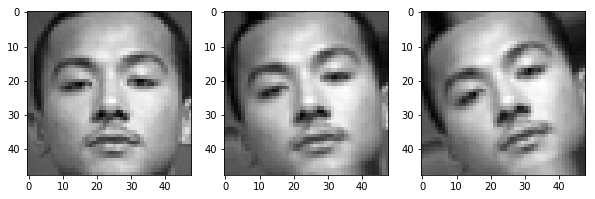

In [32]:
img_idx = 170
plt.figure(1, figsize=(10, 5))
plt.subplot(1,3, 1)
plt.imshow(img_conv.reshape_array_to_frame(train_no_happy_np[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 2)
plt.imshow(img_conv.reshape_array_to_frame(rotated_10_train[img_idx]), cmap='gray', interpolation='none')
plt.subplot(1,3, 3)
plt.imshow(img_conv.reshape_array_to_frame(rotated_20_train[img_idx]), cmap='gray', interpolation='none')
plt.show()

In [33]:
#Seems to work, going to save the data

In [34]:
rot_10_df = pd.DataFrame(rotated_10_train)
rot_10_df['emotion'] = train_no_happy['emotion']
rot_10_df

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,-0.545098,-0.538235,-0.519853,-0.534559,-0.564706,-0.539216,-0.561765,-0.512990,-0.238235,-0.083333,...,0.147059,0.166176,0.078431,0.167647,0.359804,0.432108,0.216422,-0.065686,-0.124510,0
1,0.109314,-0.032353,-0.037010,0.193627,0.345098,0.388235,0.351961,0.205147,0.226961,0.308333,...,0.111275,0.065441,-0.026716,-0.129412,-0.161765,-0.213480,-0.194363,-0.179412,-0.354412,0
2,0.241176,0.161275,0.300980,0.385539,0.480392,0.292157,-0.351961,-0.699265,-0.608333,-0.262745,...,-0.336275,-0.536029,-0.396324,-0.228431,-0.017647,0.147549,0.052451,-0.078431,-0.163235,2
3,-0.779902,-0.833333,-0.847794,-0.811275,-0.732353,-0.737255,-0.832598,-0.800490,-0.744118,-0.765196,...,0.091176,0.265441,0.565196,0.482353,0.129412,0.016176,0.035294,0.039706,0.056373,4
4,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.991912,-0.947059,-0.862745,...,-0.688725,-0.973039,-1.000000,-0.941176,-0.798039,-0.747304,-0.756863,-0.756863,-0.774510,6
5,-0.572059,-0.555882,-0.503922,-0.511275,-0.485294,-0.139216,0.216667,0.297304,0.355392,0.408824,...,-0.070588,-0.079902,-0.115686,-0.235294,-0.328431,-0.376961,-0.507843,-0.654902,-0.723039,2
6,-0.759314,-0.688235,-0.670588,-0.657843,-0.615686,-0.570588,-0.544608,-0.511029,-0.498529,-0.443137,...,-0.457353,-0.657843,-0.795098,-0.793137,-0.738235,-0.568627,-0.359559,-0.312745,-0.298039,4
7,0.734804,0.208333,-0.090931,-0.199020,-0.169608,0.046078,0.171324,0.227696,0.347549,0.398529,...,-0.101471,-0.031373,0.171324,0.254902,0.333333,0.436275,0.767892,0.973039,0.980882,2
8,-0.803922,-0.721569,-0.558333,-0.420343,-0.285294,-0.142157,-0.045343,-0.006127,0.041667,0.092647,...,-0.063725,-0.170098,-0.238725,-0.269608,-0.209804,-0.145343,0.042892,0.112255,0.246569,0
9,-0.589706,-0.633333,-0.618873,-0.448284,-0.036275,0.002941,-0.461765,-0.657843,-0.685784,-0.675000,...,-0.069118,-0.076961,-0.077206,-0.133333,-0.271569,-0.361275,-0.399020,-0.411765,-0.411765,6


In [35]:
rot_20_df = pd.DataFrame(rotated_20_train)
rot_20_df['emotion'] = train_no_happy['emotion']
rot_20_df.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
21489,-0.325490,-0.322304,-0.320343,-0.325490,-0.316912,-0.285049,-0.276225,-0.249020,-0.072549,0.082598,...,-0.200245,-0.207598,-0.172304,-0.525980,-0.751471,-0.734069,-0.699510,-0.717402,-0.729167,2
21490,-0.110049,-0.099510,-0.036275,0.128431,0.226225,-0.029902,-0.264461,-0.360294,-0.463235,-0.139706,...,-0.458824,-0.458824,-0.494363,-0.517892,-0.478676,-0.444118,-0.404412,-0.374265,-0.356373,0
21491,-0.033088,0.015196,0.078186,0.160539,0.224020,0.322059,0.391176,0.419118,0.404412,0.247549,...,0.616912,0.653676,0.640686,0.632598,0.649755,0.654902,0.639461,0.631373,0.643873,4
21492,-0.273529,-0.159804,-0.026225,0.081863,0.171078,0.212745,0.242157,0.271814,0.308578,0.316912,...,0.083088,0.105147,0.056127,0.050980,0.081618,0.095833,0.092892,0.071569,0.062990,0
21493,0.654412,0.662745,0.668137,0.682843,0.697549,0.703676,0.672059,0.686765,0.701471,0.694853,...,0.435539,0.442892,0.414706,0.405147,0.391667,0.275490,0.076961,-0.027206,-0.084804,4


In [36]:
rot_df = pd.concat([rot_10_df, rot_20_df])

In [37]:
rot_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42988 entries, 0 to 21493
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 756.3 MB


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 504.9 MB


In [39]:
#the rotated dataset and the train seems to match

In [40]:
rot_df.columns = train.columns 

In [41]:
train_expanded_rot = pd.concat([train, rot_df], axis = 0)

In [42]:
train_expanded_rot = train_expanded_rot.reset_index().drop(columns = ['index'])

In [43]:
train_expanded_rot.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
71692,-0.325490,-0.322304,-0.320343,-0.325490,-0.316912,-0.285049,-0.276225,-0.249020,-0.072549,0.082598,...,-0.200245,-0.207598,-0.172304,-0.525980,-0.751471,-0.734069,-0.699510,-0.717402,-0.729167,2
71693,-0.110049,-0.099510,-0.036275,0.128431,0.226225,-0.029902,-0.264461,-0.360294,-0.463235,-0.139706,...,-0.458824,-0.458824,-0.494363,-0.517892,-0.478676,-0.444118,-0.404412,-0.374265,-0.356373,0
71694,-0.033088,0.015196,0.078186,0.160539,0.224020,0.322059,0.391176,0.419118,0.404412,0.247549,...,0.616912,0.653676,0.640686,0.632598,0.649755,0.654902,0.639461,0.631373,0.643873,4
71695,-0.273529,-0.159804,-0.026225,0.081863,0.171078,0.212745,0.242157,0.271814,0.308578,0.316912,...,0.083088,0.105147,0.056127,0.050980,0.081618,0.095833,0.092892,0.071569,0.062990,0
71696,0.654412,0.662745,0.668137,0.682843,0.697549,0.703676,0.672059,0.686765,0.701471,0.694853,...,0.435539,0.442892,0.414706,0.405147,0.391667,0.275490,0.076961,-0.027206,-0.084804,4


In [44]:
train_expanded_rot

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
0,-0.450980,-0.372549,-0.356863,-0.435294,-0.545098,-0.545098,-0.529412,-0.505882,-0.576471,-0.545098,...,0.427451,0.435294,0.066667,-0.168627,-0.090196,-0.254902,-0.168627,-0.145098,-0.356863,0
1,0.184314,0.176471,0.152941,0.215686,0.160784,0.043137,-0.129412,0.098039,0.333333,0.364706,...,-0.152941,-0.254902,-0.152941,-0.200000,-0.474510,0.341176,0.513725,0.435294,0.443137,0
2,0.811765,0.662745,0.223529,0.286275,0.364706,0.082353,0.262745,0.356863,0.427451,0.568627,...,0.082353,0.192157,-0.043137,-0.105882,-0.207843,-0.239216,-0.309804,-0.137255,0.192157,2
3,-0.811765,-0.749020,-0.717647,-0.764706,-0.749020,-0.819608,-0.850980,-0.843137,-0.764706,-0.678431,...,-0.011765,0.035294,0.035294,0.043137,0.066667,0.090196,0.113725,0.121569,0.113725,4
4,-0.968627,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.733333,-0.756863,-0.756863,-0.756863,-0.788235,-0.756863,-0.764706,-0.772549,-0.764706,6
5,-0.568627,-0.568627,-0.568627,-0.568627,-0.568627,-0.576471,-0.529412,-0.466667,-0.576471,-0.333333,...,-0.349020,-0.396078,-0.584314,-0.709804,-0.733333,-0.764706,-0.733333,-0.764706,-0.552941,2
6,-0.843137,-0.866667,-0.850980,-0.835294,-0.803922,-0.701961,-0.670588,-0.670588,-0.639216,-0.576471,...,-0.717647,-0.466667,-0.286275,-0.333333,-0.270588,-0.239216,-0.223529,-0.160784,-0.074510,4
7,-0.396078,-0.388235,-0.380392,-0.380392,-0.388235,-0.411765,-0.529412,-0.568627,-0.631373,-0.623529,...,-0.027451,0.090196,0.176471,0.403922,0.411765,0.372549,-0.019608,-0.474510,-0.466667,3
8,-0.333333,-0.341176,-0.294118,-0.050980,-0.207843,-0.200000,0.043137,0.200000,0.200000,0.325490,...,0.184314,-0.129412,-0.168627,-0.200000,-0.223529,-0.301961,-0.545098,-0.427451,-0.341176,3
9,1.000000,0.992157,1.000000,0.992157,0.992157,0.403922,-0.043137,-0.160784,-0.254902,-0.027451,...,0.380392,0.474510,0.968627,0.976471,0.984314,0.984314,0.992157,1.000000,1.000000,2


In [62]:
# I have now the data with rotated images, my next step is to flip ALL OF IT

In [45]:
train_expanded_np = train_expanded_rot.drop(columns = ['emotion']).values

In [46]:
flipped_train_np = np.zeros(shape=train_expanded_np.shape)
for i in range(len(train_expanded_np)):
    flipped_np = img_conv.flip_frame_horitzontally(img_conv.reshape_array_to_frame(train_expanded_np[i]))
    flipped_train_np[i] = img_conv.reshape_frame_to_array(flipped_np)

In [47]:
flipped_train_np

array([[-0.67843137, -0.6627451 , -0.59215686, ..., -0.34117647,
        -0.43529412, -0.39607843],
       [-0.05882353,  0.09803922,  0.01176471, ...,  0.45098039,
         0.44313725,  0.45882353],
       [-0.8745098 , -0.78823529, -0.65490196, ...,  0.96078431,
         0.96862745,  0.96078431],
       ...,
       [ 0.54754902,  0.5745098 ,  0.58088235, ..., -0.19730392,
        -0.19215686, -0.19215686],
       [ 0.03946078, -0.04411765, -0.03161765, ...,  0.65759804,
         0.66078431,  0.65539216],
       [ 0.57181373,  0.56372549,  0.55563725, ...,  0.49289216,
         0.5       ,  0.50539216]])

In [48]:
new_train = pd.DataFrame(flipped_train_np)
new_train['emotion'] = train_expanded_rot['emotion']
new_train.tail()

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,emotion
71692,-0.298284,-0.300980,-0.301961,-0.301961,-0.301961,-0.301961,-0.301961,-0.301961,-0.304167,-0.309344,...,-0.120481,-0.211765,-0.233333,-0.254902,-0.270588,-0.270588,-0.270588,-0.271569,-0.274265,2
71693,-0.597304,-0.610784,-0.624265,-0.637745,-0.651225,-0.647059,-0.636275,-0.625490,-0.580683,-0.578646,...,-0.484544,-0.527941,-0.519853,-0.511765,-0.505147,-0.502451,-0.499755,-0.500000,-0.505392,0
71694,0.547549,0.574510,0.580882,0.575490,0.570098,0.568627,0.568627,0.568627,0.542685,0.517096,...,-0.127696,-0.237745,-0.229657,-0.221569,-0.213480,-0.205392,-0.197304,-0.192157,-0.192157,4
71695,0.039461,-0.044118,-0.031618,0.035784,0.103186,0.135294,0.154167,0.173039,0.190273,0.221936,...,0.258923,0.286275,0.415686,0.545098,0.641422,0.649510,0.657598,0.660784,0.655392,0
71696,0.571814,0.563725,0.555637,0.547549,0.539461,0.533333,0.527941,0.522549,0.566705,0.667586,...,0.522993,0.400980,0.427941,0.454902,0.476716,0.484804,0.492892,0.500000,0.505392,4


In [49]:
new_train.columns = train_expanded_rot.columns 

In [50]:
train_expanded = pd.concat([train_expanded_rot, new_train], axis = 0)

In [51]:
train_expanded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143394 entries, 0 to 71696
Columns: 2305 entries, 0 to emotion
dtypes: float64(2304), int64(1)
memory usage: 2.5 GB


In [52]:
pre.set(name='DatasetEE', value=train_expanded)

In [53]:
#Check the structure of the new training dataset

In [54]:
X_df = train_expanded.drop(columns=['emotion'])
y_df = train_expanded['emotion']

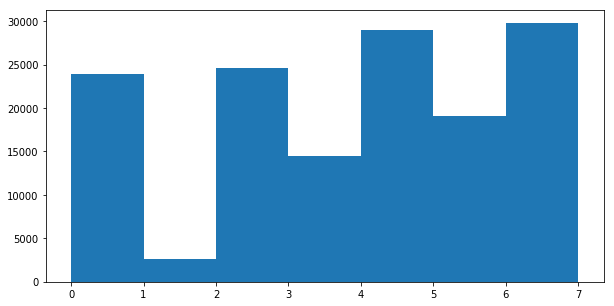

In [55]:
plt.figure(1, figsize=(10, 5))
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.show()

In [56]:
pre.save(name= 'DatasetEE')

In [57]:
print('DatasetEE saved')

DatasetEE saved


In [16]:
#compare the new with the old one

In [46]:
pre.load_data(filename='train_norm.csv', name='train_norm')

X_df_old = pre.get(name='train_norm').drop(columns=['emotion'])
y_df_old= pre.get(name='train_norm')['emotion']

In [49]:
pre.load_data(filename='train_expanded_disgust.csv', name='train_expanded_disgust')

X_df_exp_c1 = pre.get(name='train_expanded_disgust').drop(columns=['emotion'])
y_df_exp_c1 = pre.get(name='train_expanded_disgust')['emotion']

In [48]:
pre.load_data(filename='train_expanded.csv', name='train_expanded')

X_df_exp = pre.get(name='train_expanded').drop(columns=['emotion'])
y_df_exp = pre.get(name='train_expanded')['emotion']

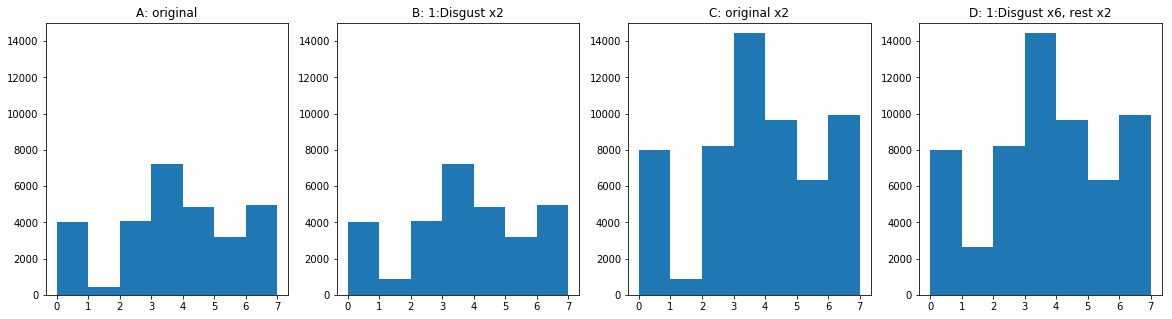

In [69]:
plt.figure(1, figsize=(20, 5))
plt.subplot(1,4, 1)
plt.hist(y_df_old.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('A: original')
plt.subplot(1,4, 2)
plt.hist(y_df_exp_c1.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('B: 1:Disgust x2')
plt.subplot(1,4, 3)
plt.hist(y_df_exp.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('C: original x2')
plt.subplot(1,4, 4)
plt.hist(y_df.values, bins = [0, 1, 2, 3, 4, 5, 6, 7])
plt.ylim([0,15000])
plt.title('D: 1:Disgust x6, rest x2')
plt.show()